# Taller 03: Analítica de Datos

### David Mateo Henao Prieto
### Fabio Luis Buitrago Ochoa

### Objetivos
●  Familiarizar al estudiante ante una situación similar a la real en donde se requiere analizar un conjunto de datos. En particular, transacciones de compra de una tienda de conveniencia (retail).

●  Explorar, describir y argumentar el comportamiento de distintas implementaciones de algoritmos distintos que resuelven el mismo problema. En particular, algoritmos de reglas de asociación.

●  Elaborar reportes académicos posteriores a la experimentación, medición y observación de fenómenos estudiados. Medición de rendimiento de dos implementaciones, elaboración de apoyo a la explicación del fenómeno, y argumentación basada en la observación, razonamiento y estudio del fenómeno.

# Importación de Librerías

In [51]:
from dbfread import DBF # Lectura de archivos .DBF (Tipo de archivo que contiene la información transaccional de las facturas)
import re # Generación de expresiones regulares: Utilizada para el procesamiento y limpieza inicial de los datos
import matplotlib.pyplot as plt
from collections import defaultdict # Para realizar el conteo y agrupación de los 
import numpy as np

# Desarrollo

## Punto 01
### Lea la documentación de las reglas de asociación para los algoritmos apriori y fp-growth.

## Punto 02
### Construya las funciones o métodos que permita leer y parser en objetos de tipo line-item y factura.

●  Un objeto de tipo line-item de factura contiene el nombre del producto, la cantidad de items vendidos el producto precio por unidad, y el valor el subtotal de la compra.

●  Un objeto de tipo Factura contiene: el número o consecutivo de factura, la fecha o marca de tiempo, el total de la factura, el total del impuesto, la cantidad total de items.


In [3]:
from dbfread import DBF
import re

class LineItem:
    def __init__(self, product_name, quantity, unit_price):
        self.product_name = product_name
        self.quantity = quantity
        self.unit_price = unit_price
        self.subtotal = quantity * unit_price

class Factura:
    def __init__(self, numero_factura):
        self.numero_factura = numero_factura
        self.line_items = []
        self.total = 0
        self.cantidad_total_items = 0

def parse_line_item(record):
    return LineItem(re.sub(r'\s+\S*$', '', record["DESCRI"]), record["CANT"], record["PRECIO"])

def parse_facturas(dbf_paths):
    facturas_dict = {}
    for dbf_path in dbf_paths:
        for record in DBF(dbf_path):
            numero_factura = record["FACNRO"]
            if numero_factura not in facturas_dict:
                facturas_dict[numero_factura] = Factura(numero_factura)
            factura = facturas_dict[numero_factura]
            line_item = parse_line_item(record)
            factura.line_items.append(line_item)
            factura.total += line_item.subtotal
            factura.cantidad_total_items += line_item.quantity
    return facturas_dict

# Función genérica que recibe una lista de rutas de archivos DBF
def parte_facturas(dbf_paths):
    facturas_dict = parse_facturas(dbf_paths)
    for numero_factura, factura in facturas_dict.items():
        print(f"Numero de Factura: {numero_factura}")
        print(f"Total: {factura.total}")
        print(f"Cantidad Total de Items: {factura.cantidad_total_items}")
        for item in factura.line_items:
            print(f"    Producto: {item.product_name}, Cantidad: {item.quantity}, Precio Unitario: {item.unit_price}")
    return facturas_dict

# Ejemplo de uso
dbf_paths = ["sabado/fc06042024.DBF", "sabado/fc09032024.DBF"]
facturas_dict = parte_facturas(dbf_paths)


Numero de Factura: 61642
Total: 4873.95
Cantidad Total de Items: 1.0
    Producto: LUCKY DAIQUIRI X 10, Cantidad: 1.0, Precio Unitario: 4873.95
Numero de Factura: 61643
Total: 2004.2
Cantidad Total de Items: 2.0
    Producto: TAPABOCAS X UND, Cantidad: 1.0, Precio Unitario: 504.2
    Producto: DESCONGEL GRIPA, Cantidad: 1.0, Precio Unitario: 1500.0
Numero de Factura: 61644
Total: 2000.0
Cantidad Total de Items: 1.0
    Producto: AROMATICA  7 OZ, Cantidad: 1.0, Precio Unitario: 2000.0
Numero de Factura: 581
Total: 200000.0
Cantidad Total de Items: 100.0
    Producto: EMPANADAS, Cantidad: 100.0, Precio Unitario: 2000.0
Numero de Factura: 61645
Total: 1848.74
Cantidad Total de Items: 1.0
    Producto: HALLS BARRA  25 GR, Cantidad: 1.0, Precio Unitario: 1848.74
Numero de Factura: 61646
Total: 336.14
Cantidad Total de Items: 2.0
    Producto: HALLS X UNIDAD, Cantidad: 2.0, Precio Unitario: 168.07
Numero de Factura: 61647
Total: 5000.0
Cantidad Total de Items: 2.0
    Producto: AMERICANO 9 O

# Punto 03
## Análisis Descriptivo

### Punto A: 
 Generalidades del conjunto de datos
 Este análisis contiene al menos: la cantidad de registros, facturas, cantidad promedio de ítems por factura, cantidad máxima de ítems encontrado en las facturas del conjunto de datos, distribución de las compras por cantidad y precio de facturas por hora.

Cantidad total de registros: 18214
Cantidad total de facturas: 8647
Cantidad promedio de ítems por factura: 5.555684052272465
Cantidad máxima de ítems en una factura: 1538.0

Distribución de las compras por cantidad:
Mínimo: 215.0 (1), Máximo: 1.0 (15437)

Distribución de las compras por precio:
Mínimo: 19327.73 (1), Máximo: 3000.0 (1058)


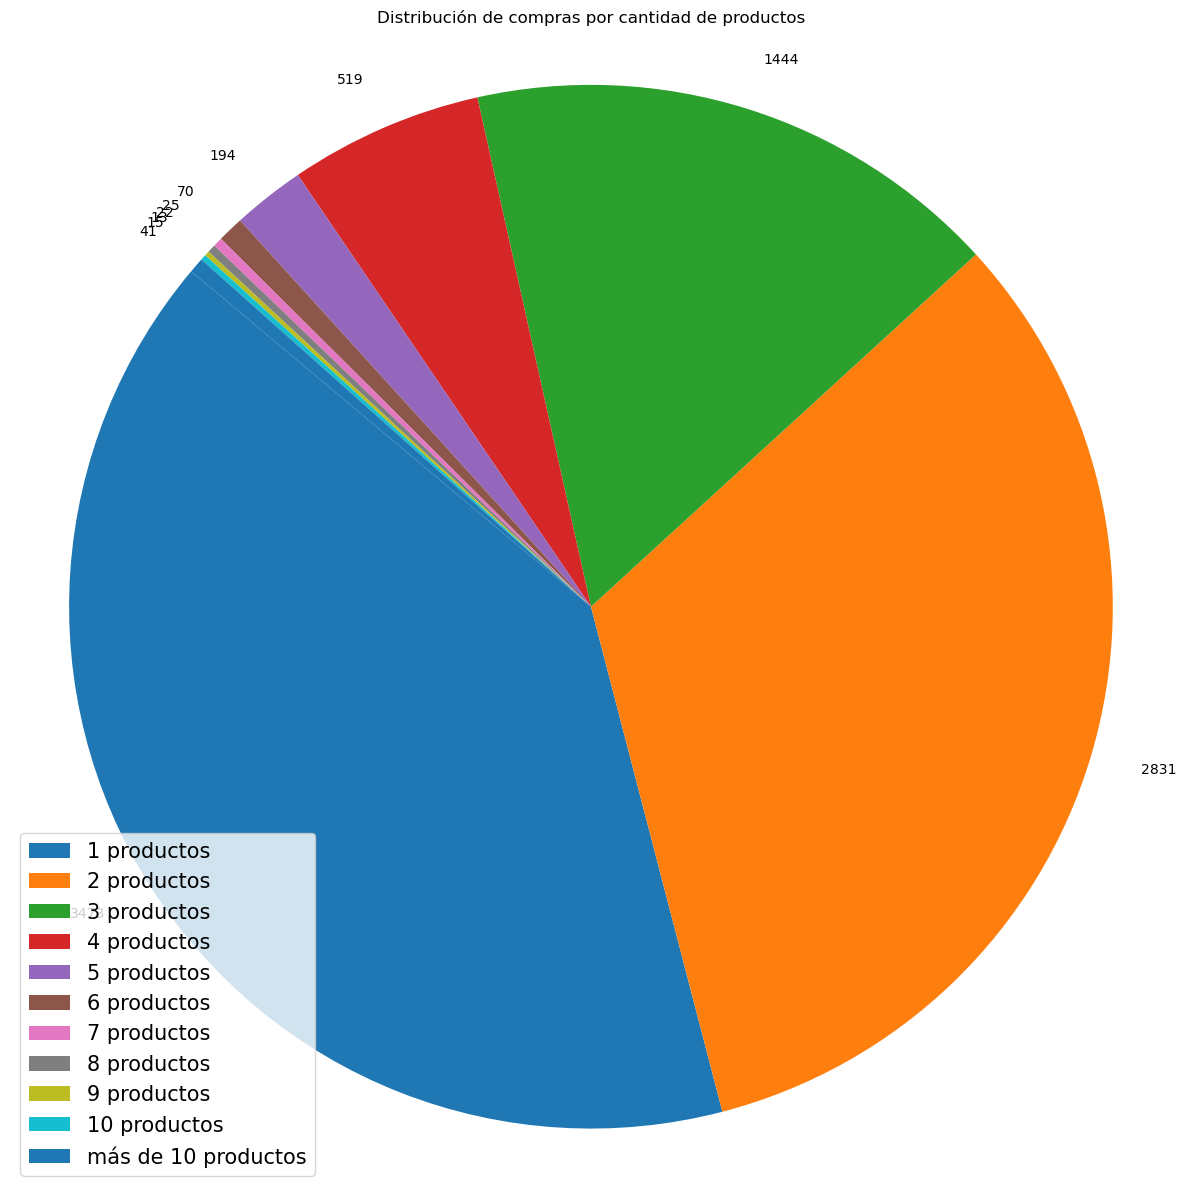

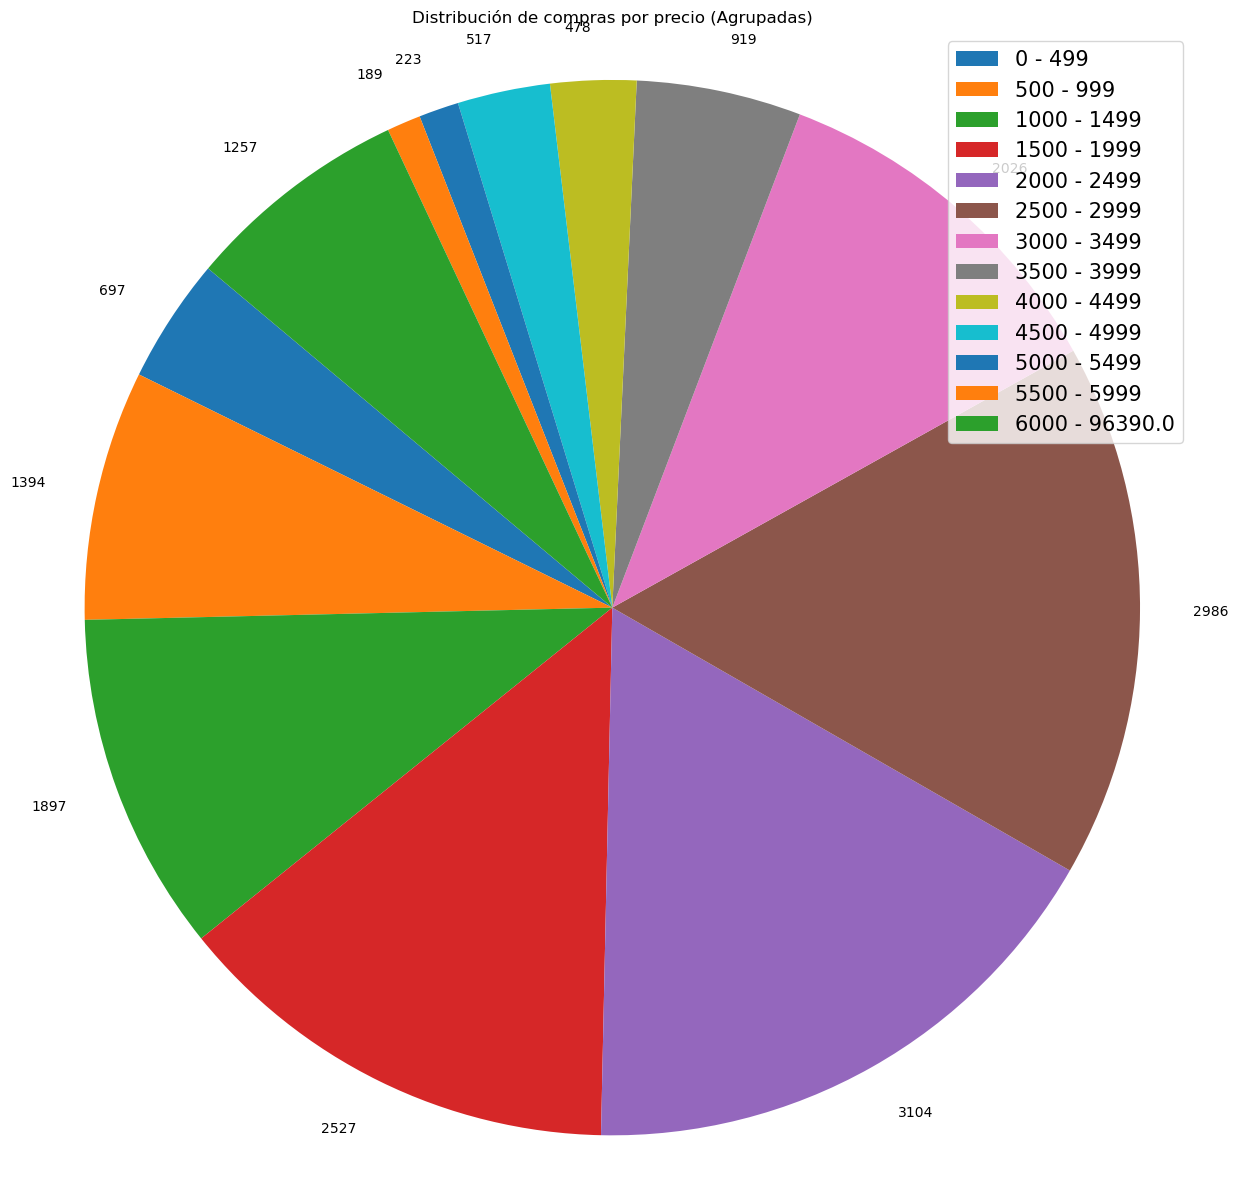

In [4]:
def get_dataset_info(facturas_dict):
    total_registros = sum(len(factura.line_items) for factura in facturas_dict.values())
    total_facturas = len(facturas_dict)
    total_items = sum(factura.cantidad_total_items for factura in facturas_dict.values())
    max_items_por_factura = max(factura.cantidad_total_items for factura in facturas_dict.values())

    compras_por_cantidad = {}
    compras_por_precio = {}

    for factura in facturas_dict.values():
        for item in factura.line_items:
            cantidad_compra = item.quantity
            precio_compra = item.unit_price
            compras_por_cantidad[cantidad_compra] = compras_por_cantidad.get(cantidad_compra, 0) + 1
            compras_por_precio[precio_compra] = compras_por_precio.get(precio_compra, 0) + 1

    cantidad_promedio_por_factura = total_items / total_facturas

    return {
        "total_registros": total_registros,
        "total_facturas": total_facturas,
        "cantidad_promedio_por_factura": cantidad_promedio_por_factura,
        "max_items_por_factura": max_items_por_factura,
        "compras_por_cantidad": compras_por_cantidad,
        "compras_por_precio": compras_por_precio
    }

# Ejemplo de uso
dataset_info = get_dataset_info(facturas_dict)
print("Cantidad total de registros:", dataset_info["total_registros"])
print("Cantidad total de facturas:", dataset_info["total_facturas"])
print("Cantidad promedio de ítems por factura:", dataset_info["cantidad_promedio_por_factura"])
print("Cantidad máxima de ítems en una factura:", dataset_info["max_items_por_factura"])

compras_por_cantidad = dataset_info["compras_por_cantidad"]
compras_por_precio = dataset_info["compras_por_precio"]

min_cantidad = min(compras_por_cantidad.values())
max_cantidad = max(compras_por_cantidad.values())
min_cantidad_key = [key for key, value in compras_por_cantidad.items() if value == min_cantidad][0]
max_cantidad_key = [key for key, value in compras_por_cantidad.items() if value == max_cantidad][0]

min_precio = min(compras_por_precio.values())
max_precio = max(compras_por_precio.values())
min_precio_key = [key for key, value in compras_por_precio.items() if value == min_precio][0]
max_precio_key = [key for key, value in compras_por_precio.items() if value == max_precio][0]

print("")
print("Distribución de las compras por cantidad:")
print(f"Mínimo: {min_cantidad_key} ({min_cantidad}), Máximo: {max_cantidad_key} ({max_cantidad})")

print("\nDistribución de las compras por precio:")
print(f"Mínimo: {min_precio_key} ({min_precio}), Máximo: {max_precio_key} ({max_precio})")

# Contar cuántos productos hay en cada compra
productos_por_compra = {numero_factura: len(factura.line_items) for numero_factura, factura in facturas_dict.items()}

# Inicializar el diccionario de compras agrupadas por cantidad de productos
compras_agrupadas = {f"{i} productos": 0 for i in range(1, 11)}
compras_agrupadas["más de 10 productos"] = 0

# Agrupar las compras por cantidad de productos
for cantidad_productos in productos_por_compra.values():
    if cantidad_productos <= 10:
        compras_agrupadas[f"{cantidad_productos} productos"] += 1
    else:
        compras_agrupadas["más de 10 productos"] += 1

# Crear gráfico de pastel con etiquetas al lado
plt.figure(figsize=(15, 15))
plt.pie(compras_agrupadas.values(), labels=compras_agrupadas.values(), startangle=140, labeldistance=1.1, textprops={'fontsize': 10})
plt.legend(compras_agrupadas.keys(), fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de compras por cantidad de productos')
plt.show()


# Definir los rangos y sus etiquetas
rangos = [(x, x + 499) for x in range(0, 6000, 500)]
rangos.append((6000, max(compras_por_precio.keys())))
etiquetas = [f"{rango[0]} - {rango[1]}" for rango in rangos]

# Inicializar el diccionario de compras agrupadas
compras_agrupadas = {etiqueta: 0 for etiqueta in etiquetas}

# Agrupar las compras por precio
for precio, cantidad in compras_por_precio.items():
    for indice, rango in enumerate(rangos):
        if rango[0] <= precio <= rango[1]:
            compras_agrupadas[etiquetas[indice]] += cantidad

# Crear gráfico de pastel con etiquetas al lado
plt.figure(figsize=(15, 15))
plt.pie(compras_agrupadas.values(), labels=compras_agrupadas.values(), startangle=140, labeldistance=1.1, textprops={'fontsize': 10})
plt.legend(compras_agrupadas.keys(), fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de compras por precio (Agrupadas)')
plt.show()


### Punto B
Identifique el producto más vendido por hora y del conjunto de datos.

In [5]:
# Inicializar un diccionario para almacenar la cantidad total vendida de cada producto
productos_vendidos = defaultdict(int)

# Calcular la cantidad total vendida de cada producto
for factura in facturas_dict.values():
    for line_item in factura.line_items:
        productos_vendidos[line_item.product_name] += line_item.quantity

# Obtener los 10 productos más vendidos
productos_mas_vendidos = dict(sorted(productos_vendidos.items(), key=lambda item: item[1], reverse=True)[:10])

# Imprimir los 10 productos más vendidos
print("Los 10 productos más vendidos:")
for producto, cantidad in productos_mas_vendidos.items():
    print(f"-> {producto}: {cantidad}")

Los 10 productos más vendidos:
-> EMPANADAS: 2713.0
-> PASTELES. PALITOS: 1339.0
-> JUGO HIT  500 ML: 1073.0
-> DESECHABLE X UND: 1072.0
-> SANDWICH SENCILLO: 726.0
-> COCA COLA FLEXI 400 ML: 596.0
-> CANDYRANCH 13GR: 527.0
-> PASTILLAS CHAO CEREZA: 457.0
-> CERVEZA POKER  355ML: 403.0
-> ROTHMANS AZUL X10: 370.0


### Punto C:
Compare la cantidad del producto más vendido con respecto del TOP 10.

In [6]:
# Encontrar el producto más vendido
producto_mas_vendido, cantidad_mas_vendida = max(productos_vendidos.items(), key=lambda item: item[1])

# Encontrar los 10 productos más vendidos
productos_mas_vendidos = dict(sorted(productos_vendidos.items(), key=lambda item: item[1], reverse=True)[:10])

# Calcular la cantidad total de los 10 productos más vendidos
cantidad_top_10 = sum(productos_mas_vendidos.values())

# Imprimir las cantidades
print(f"Cantidad del producto más vendido ({producto_mas_vendido}): {cantidad_mas_vendida}")
print(f"Cantidad total de los 10 productos más vendidos: {cantidad_top_10}")

# Calcular la proporción del producto más vendido con respecto al TOP 10
proporcion = cantidad_mas_vendida / cantidad_top_10 if cantidad_top_10 != 0 else 0
print(f"Proporción del producto más vendido con respecto al TOP 10: {proporcion:.2%}")

Cantidad del producto más vendido (EMPANADAS): 2713.0
Cantidad total de los 10 productos más vendidos: 9276.0
Proporción del producto más vendido con respecto al TOP 10: 29.25%


### Punto D:
Identifique el producto menos vendido, y su aparición de hora. Describa otras características como si se vendió solo, o en conjunto con otros productos.

In [7]:
# Inicializar un diccionario para almacenar la cantidad total vendida de cada producto
productos_vendidos = defaultdict(int)

# Inicializar un diccionario para almacenar los productos vendidos en cada factura
productos_por_factura = defaultdict(list)

# Calcular la cantidad total vendida de cada producto y los productos vendidos en cada factura
for factura in facturas_dict.values():
    for line_item in factura.line_items:
        productos_vendidos[line_item.product_name] += line_item.quantity
        productos_por_factura[factura.numero_factura].append(line_item.product_name)

# Encontrar todos los productos vendidos una vez
productos_vendidos_una_vez = [producto for producto, cantidad in productos_vendidos.items() if cantidad == 1]

# Verificar con qué otros productos se vendieron los productos vendidos una vez
productos_conjunto = defaultdict(list)
for factura, productos in productos_por_factura.items():
    for producto in productos_vendidos_una_vez:
        if producto in productos:
            otros_productos = [p for p in productos if p != producto]
            productos_conjunto[producto].extend(otros_productos)

# Imprimir los productos vendidos una vez y con qué otros productos se vendieron
print("Productos vendidos una vez:")
for producto in productos_vendidos_una_vez:
    print(f"- {producto}: vendido con {', '.join(productos_conjunto[producto])}")


Productos vendidos una vez:
- CHEERS 180GR: vendido con BOLSA REGALO CRAF MEDIANA
- MANI LA ESPECIAL NUECES 180 GR: vendido con BROWNIE CHOCORRAMO  65GR, BARRA TOSH 23 GR, FINESSE MUSLI  170 GR
- CHICLES CUADRIX 12GR: vendido con 
- CHOCMELO ICE CREAM 19GR: vendido con EMPANADAS, PASTILLAS CHAO CEREZA
- RESALTADORES PAQUETE: vendido con ESTUCHE PELANAS 100 GR, CHOCMELO BESOS 30GR
- CANDY TOY MEGA SAUR 12GR: vendido con CANDILEIRO BABY FUN,12GR, PASTILLAS CHAO CEREZA
- PUSH POP 14GR: vendido con PASTILLAS CHAO CEREZA, CANDYRANCH 13GR, PIN POP ACIDO 15GR
- PIN POP ACIDO 15GR: vendido con PASTILLAS CHAO CEREZA, PUSH POP 14GR, CANDYRANCH 13GR
- YOGURT KIDS ALQUERIA 150GR: vendido con GALLETA COCO PIQUITOS  90GR, YOGO YOGO  150GR, SUPER CREMOSA ENTERA 180ML ALQUERIA, SMARTIES PASTILLA.
- PET HOUSE 4GR: vendido con BOLSA REGALO METALIZADA PEQUEÑA, WAFER JET 22GR, TRIDENT 10 GR
- JAGERMEILTER 350ML: vendido con 
- VUSE GO 500 PUFFS: vendido con PAPAS SUPER RICAS105GR
- TE HIERBAS NATURALES 1.

# Punto 04
## Hipótesis

Construya una hipótesis a partir del análisis inicial. La hipótesis orienta el sentido del análisis, en este caso se quiere identificar cuales productos son más o menos vendidos y si es posible elaborar combos entre los productos más vendidos, los productos menos vendidos y otras relaciones entre productos con la misma/distinta categoría.**

# Punto 05

Utilice la biblioteca xlmtend para encontrar relaciones entre productos. Construya una tabla de comparación entre las dos implementaciones de Reglas de Asociación.

## Preprocesamiento de los datos para el análsis
Leer datos, convertirlos a dataframe, extraer número de factura y nombre del producto y limpiar el nombre del producto para que desaparezca contenido basura para el primer archivo

In [8]:
from dbfread import DBF
import pandas as pd
import re
from mlxtend.preprocessing import TransactionEncoder


archivo_dbf1='sabado/fc06042024.DBF'

tabla_dbf1 = DBF(archivo_dbf1)

df1 = pd.DataFrame(tabla_dbf1)

columnas_deseadas = ['FACNRO', 'DESCRI']
df1 = df1[columnas_deseadas]
df1['DESCRI'] = df1['DESCRI'].apply(lambda x: re.sub(r'\s+\S*$', '', x))

print(df1.head(10))

   FACNRO                     DESCRI
0   61642        LUCKY DAIQUIRI X 10
1   61643            TAPABOCAS X UND
2   61643            DESCONGEL GRIPA
3   61644            AROMATICA  7 OZ
4     581                  EMPANADAS
5   61645         HALLS BARRA  25 GR
6   61646             HALLS X UNIDAD
7   61647          AMERICANO 9 ONZAS
8   61648         AGUA CRISTAL LITRO
9   61648  JET COOKIES AND CREAM 21G


Leer datos, convertirlos a dataframe, extraer número de factura y nombre del producto y limpiar el nombre del producto para que desaparezca contenido basura para el segundo archivo

In [9]:
archivo_dbf2='sabado/fc09032024.DBF'

tabla_dbf2 = DBF(archivo_dbf2)

df2 = pd.DataFrame(tabla_dbf2)

columnas_deseadas = ['FACNRO', 'DESCRI']
df2 = df2[columnas_deseadas]
df2['DESCRI'] = df2['DESCRI'].apply(lambda x: re.sub(r'\s+\S*$', '', x))

print(df2.head(10))

   FACNRO                     DESCRI
0   23102  BRISA LIMON-MANZANA 600ML
1   23102               TIC TAC 16GR
2   49554             VIVE 100 LITRO
3   49554             LUCKY GIN X 10
4   49555        CRISTAL ALOE 330 ML
5   49555                PONKY 33 GR
6   49555                PONKY 33 GR
7   49555      PASTILLAS CHAO CEREZA
8   49556                YOX  100 ML
9   49556   BROWNIE CHOCORRAMO  65GR


Convirtiendo el dataset para que haya una lista de productos por cada número de factura. La información anterior no asocia cuando dos productos hacen parte de la misma factura, que es lo que se hace en ese fragmento. Juntar los dos archivos de información

In [10]:
from collections import defaultdict

facturas = defaultdict(list)

for factura, producto in df1.values:
    facturas[factura].append(producto)

for factura, producto in df2.values:
    facturas[factura].append(producto)

facturas_lista = [[factura, *productos] for factura, productos in facturas.items()]

print(facturas_lista)

[[61642, 'LUCKY DAIQUIRI X 10'], [61643, 'TAPABOCAS X UND', 'DESCONGEL GRIPA'], [61644, 'AROMATICA  7 OZ'], [581, 'EMPANADAS'], [61645, 'HALLS BARRA  25 GR'], [61646, 'HALLS X UNIDAD'], [61647, 'AMERICANO 9 ONZAS'], [61648, 'AGUA CRISTAL LITRO', 'JET COOKIES AND CREAM 21G'], [61649, 'GALLETA NUCITA 20 GR', 'GALLETAS CHOKIS  40 GR'], [61650, 'BRICKET TOKAY'], [61651, 'LUCKY ALASKA X10'], [61652, 'LECHE ALPINA  DESLACTOSADA 200ML'], [61653, 'BOMBAS CROMADA X 12 UN', 'FESTON FELIZ CUMPLEAÑOS METALIZADO'], [61654, 'JUGO HIT  500 ML'], [61655, 'JUMBO MIX  60GR', 'JET COOKIES AND CREAM 21G', 'TRULULU GOMAS/MASMELOS 80GR', 'WAFER JET 22GR'], [61656, 'LUCKY ALASKA X10'], [61657, 'VIVE 100. 380ML', 'EMPANADAS', 'JUMBO 35GR'], [61658, 'LUCKY ALASKA X10'], [61659, 'CLUB SOCIAL   26 GR'], [61660, 'TRULULU UNIDAD'], [61661, 'CLUB SOCIAL   26 GR'], [61662, 'NUTELLA MINI  15GR'], [61663, 'LUCKY GIN X 10'], [61664, 'COCA COLA 3 LITROS'], [61665, 'CHEERS 180GR', 'BOLSA REGALO CRAF MEDIANA'], [61666, 'T

Quitar el número de la factura ya que ya se tienen relacionados los productos de cada transacción

In [11]:
nuevo_dataset = []
for factura in facturas_lista:
    productos = factura[1:]  
    nuevo_dataset.append(productos)

print(nuevo_dataset)


[['LUCKY DAIQUIRI X 10'], ['TAPABOCAS X UND', 'DESCONGEL GRIPA'], ['AROMATICA  7 OZ'], ['EMPANADAS'], ['HALLS BARRA  25 GR'], ['HALLS X UNIDAD'], ['AMERICANO 9 ONZAS'], ['AGUA CRISTAL LITRO', 'JET COOKIES AND CREAM 21G'], ['GALLETA NUCITA 20 GR', 'GALLETAS CHOKIS  40 GR'], ['BRICKET TOKAY'], ['LUCKY ALASKA X10'], ['LECHE ALPINA  DESLACTOSADA 200ML'], ['BOMBAS CROMADA X 12 UN', 'FESTON FELIZ CUMPLEAÑOS METALIZADO'], ['JUGO HIT  500 ML'], ['JUMBO MIX  60GR', 'JET COOKIES AND CREAM 21G', 'TRULULU GOMAS/MASMELOS 80GR', 'WAFER JET 22GR'], ['LUCKY ALASKA X10'], ['VIVE 100. 380ML', 'EMPANADAS', 'JUMBO 35GR'], ['LUCKY ALASKA X10'], ['CLUB SOCIAL   26 GR'], ['TRULULU UNIDAD'], ['CLUB SOCIAL   26 GR'], ['NUTELLA MINI  15GR'], ['LUCKY GIN X 10'], ['COCA COLA 3 LITROS'], ['CHEERS 180GR', 'BOLSA REGALO CRAF MEDIANA'], ['TRIDENT 10 GR'], ['TRULULU CHOCOLORES 30GR', 'TRIDENT 10 GR', 'MENTA CHAO LÍNEA'], ['TRULULU CHOCOLORES 30GR', 'GOL MEGA AREQUIPE 53GR'], ['EMPANADAS', 'ALPIN CAJA  200 ML'], ['PONK

Proceso copiado de la implementación en el ejemplo del profesor ya con en dataset final

In [12]:
te = TransactionEncoder()
te_array = te.fit(nuevo_dataset).transform(nuevo_dataset)
df = pd.DataFrame(te_array, columns=te.columns_)
print(df)

                    DORITO DINAMITA 200 GR   ANTIOQUEÑO VERDE  750 ML  \
0     False                          False                      False   
1     False                          False                      False   
2     False                          False                      False   
3     False                          False                      False   
4     False                          False                      False   
...     ...                            ...                        ...   
8642  False                          False                      False   
8643  False                          False                      False   
8644  False                          False                      False   
8645  False                          False                      False   
8646  False                          False                      False   

       DUX  RELLENAS 36GR   DUX QUESO 36GR  \
0                   False            False   
1                   False      

## Generación de modelos

### Punto A
Utilice la implementación de apriori


In [36]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(df, min_support=0.001, use_colnames=True)
print(frequent_itemsets_ap)

      support                                 itemsets
0    0.003701          (       DORITO DINAMITA 200 GR)
1    0.001619                    ( DUX  RELLENAS 36GR)
2    0.002776                        ( DUX QUESO 36GR)
3    0.001850    ( KELLOGG'S RICE KRISPIES TREATS 22G)
4    0.004626                  (ACQUA POSTOBON 400 ML)
..        ...                                      ...
498  0.001041   (SANDWICH SENCILLO, PASTELES. PALITOS)
499  0.001156  (TODO RICO BBQ 45GR, PASTELES. PALITOS)
500  0.001041       (PASTELES. PALITOS, TRIDENT 10 GR)
501  0.001156     (PONKY 33 GR, PASTILLAS CHAO CEREZA)
502  0.001503   (PASTILLAS CHAO CEREZA, TRIDENT 10 GR)

[503 rows x 2 columns]


### Punto B
Utilice la implementación de fp-growth.

In [37]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp=fpgrowth(df, min_support=0.001, use_colnames=True)
print(frequent_itemsets_fp)

      support                                     itemsets
0    0.002429                        (LUCKY DAIQUIRI X 10)
1    0.001041                            (TAPABOCAS X UND)
2    0.002660                            (AROMATICA  7 OZ)
3    0.107089                                  (EMPANADAS)
4    0.022898                         (HALLS BARRA  25 GR)
..        ...                                          ...
498  0.001041             (EMPANADAS, CAFE AMERICANO 7 OZ)
499  0.001388             (AVENA ALPINA  250GR, EMPANADAS)
500  0.001156                   (MOCACHINO 7OZ, EMPANADAS)
501  0.001272               (IMPRESIONES, FOTOCOPIA 1CARA)
502  0.001156  (ARTESANAL  MARACUYA 70GR, CHOCO CONO 90GR)

[503 rows x 2 columns]


In [45]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)

rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.1)

In [46]:
print(rules_ap)

       antecedents  consequents  antecedent support  consequent support  \
0  (MOCACHINO 7OZ)  (EMPANADAS)            0.002082            0.107089   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.001156    0.555556  5.187785  0.000934    2.009049       0.808923  


In [40]:
print(rules_fp)

                         antecedents                       consequents  \
0                   (CAPUCHINO 7 OZ)                       (EMPANADAS)   
1              (CHOCOLATE LECHE 9OZ)               (PASTELES. PALITOS)   
2              (ALPIN BOTELLA 300ML)                       (EMPANADAS)   
3                (PULP NECTAR 400ML)                       (EMPANADAS)   
4                       (LATTE 7 OZ)                       (EMPANADAS)   
5   (CERVEZA  AGUILA ORIGINAL 355ML)            (CERVEZA POKER  355ML)   
6             (CERVEZA POKER  355ML)  (CERVEZA  AGUILA ORIGINAL 355ML)   
7              (AVENA ALPINA  250GR)                       (EMPANADAS)   
8                    (MOCACHINO 7OZ)                       (EMPANADAS)   
9                      (IMPRESIONES)                 (FOTOCOPIA 1CARA)   
10                 (FOTOCOPIA 1CARA)                     (IMPRESIONES)   
11                 (CHOCO CONO 90GR)        (ARTESANAL  MARACUYA 70GR)   

    antecedent support  consequent su

# Realización de los algoritmos de asignación con diferentes valores

Valores de min_support[0.001-0.01]-Valores de min_threshold[0.1-0.5]

In [65]:
import time

soporte = np.arange(0.001, 0.011, 0.001)
threshold = np.arange(0.1, 0.51, 0.1)
print (soporte)
print (threshold)

with open("reglas_de_asociacion.txt", "w") as archivo:
    for i in soporte:
        for j in threshold:
            
            inicio_apriori = time.time()
            frequent_itemsets_ap = apriori(df, min_support=i, use_colnames=True)
            rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=j)
            tiempo_apriori = time.time() - inicio_apriori
            
            inicio_fp = time.time()
            frequent_itemsets_fp=fpgrowth(df, min_support=i, use_colnames=True)
            rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=j)
            tiempo_fp = time.time() - inicio_fp


            archivo.write (f"soporte: {i}, threshold: {j}\n")
            archivo.write (f"Tiempo de ejecución apriori: {tiempo_apriori}\n")
            archivo.write(rules_ap.to_string())
            archivo.write("\n")
            archivo.write (f"Tiempo de ejecución fp-growth: {tiempo_fp}\n")
            archivo.write(rules_fp.to_string())
            archivo.write("\n")


[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01 ]
[0.1 0.2 0.3 0.4 0.5]
